<img src="https://res-5.cloudinary.com/crunchbase-production/image/upload/c_lpad,h_256,w_256,f_auto,q_auto:eco/v1455514364/pim02bzqvgz0hibsra41.png" align="right"><br><br><FONT FACE="times new roman" SIZE=5>
<br>
<i><b>Docente:</b></i> John Corredor
<br>
<i><b>Asignatura:</b></i> Machine Learning Computación Avanzada
<br>
<i><b>Tema:</b></i> Clasificador ML
<br>
<i><b>Estudiantes:<br></b></i> Daniel Alejandro Olarte Ávila<br>
</b></i> Bryan Ferney Hernandez Pineda

24/10/21
<br>
</FONT>
</div>

#SEGUNDO EXAMEN PARCIAL
* 1 Presentación del Repositorio donde se encuentre los ficheros fuentes del Programa LR en C++
* 2 En el Repositorio debe estar el cuaderno notebook (.ipynb) que presente:
    - La verificación de los coeficientes de LR por SkLearn
    - Gráfica de la función de costo 
* 3 Se puede presentar por grupos máximo de 2 personas

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()

In [2]:
url = '/content/sample_data/winedata.csv'

In [3]:
#Se le agrega las columnas debido a que no las tiene
columnas =['fixed acidity','volatile acidity','citric acid','residual sugar','chlorides','free sulfur dioxide','total sulfur dioxide','density','pH','sulphates','alcohol','quality']

In [4]:
df_wineNoNorm = pd.read_csv(url,header=None)
df_wineNoNorm.columns = columnas
df_wineNoNorm.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
3,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5


In [5]:
#Visualizacion estadistica de los datos
df_wineNoNorm.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1598.0,8.319962,1.741593,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1598.0,0.527675,0.179021,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1598.0,0.271120,0.194776,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1598.0,2.538955,1.410357,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1598.0,0.087464,0.047080,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1598.0,15.875469,10.463408,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1598.0,46.463079,32.905082,6.00000,22.0000,38.00000,62.000000,289.00000
density,1598.0,0.996747,0.001888,0.99007,0.9956,0.99675,0.997837,1.00369
pH,1598.0,3.311145,0.154429,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1598.0,0.658154,0.169560,0.33000,0.5500,0.62000,0.730000,2.00000


In [6]:
#Se revisa la informacion sobre los tipos de datos del dataframe
df_wineNoNorm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1598 entries, 0 to 1597
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1598 non-null   float64
 1   volatile acidity      1598 non-null   float64
 2   citric acid           1598 non-null   float64
 3   residual sugar        1598 non-null   float64
 4   chlorides             1598 non-null   float64
 5   free sulfur dioxide   1598 non-null   float64
 6   total sulfur dioxide  1598 non-null   float64
 7   density               1598 non-null   float64
 8   pH                    1598 non-null   float64
 9   sulphates             1598 non-null   float64
 10  alcohol               1598 non-null   float64
 11  quality               1598 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.9 KB


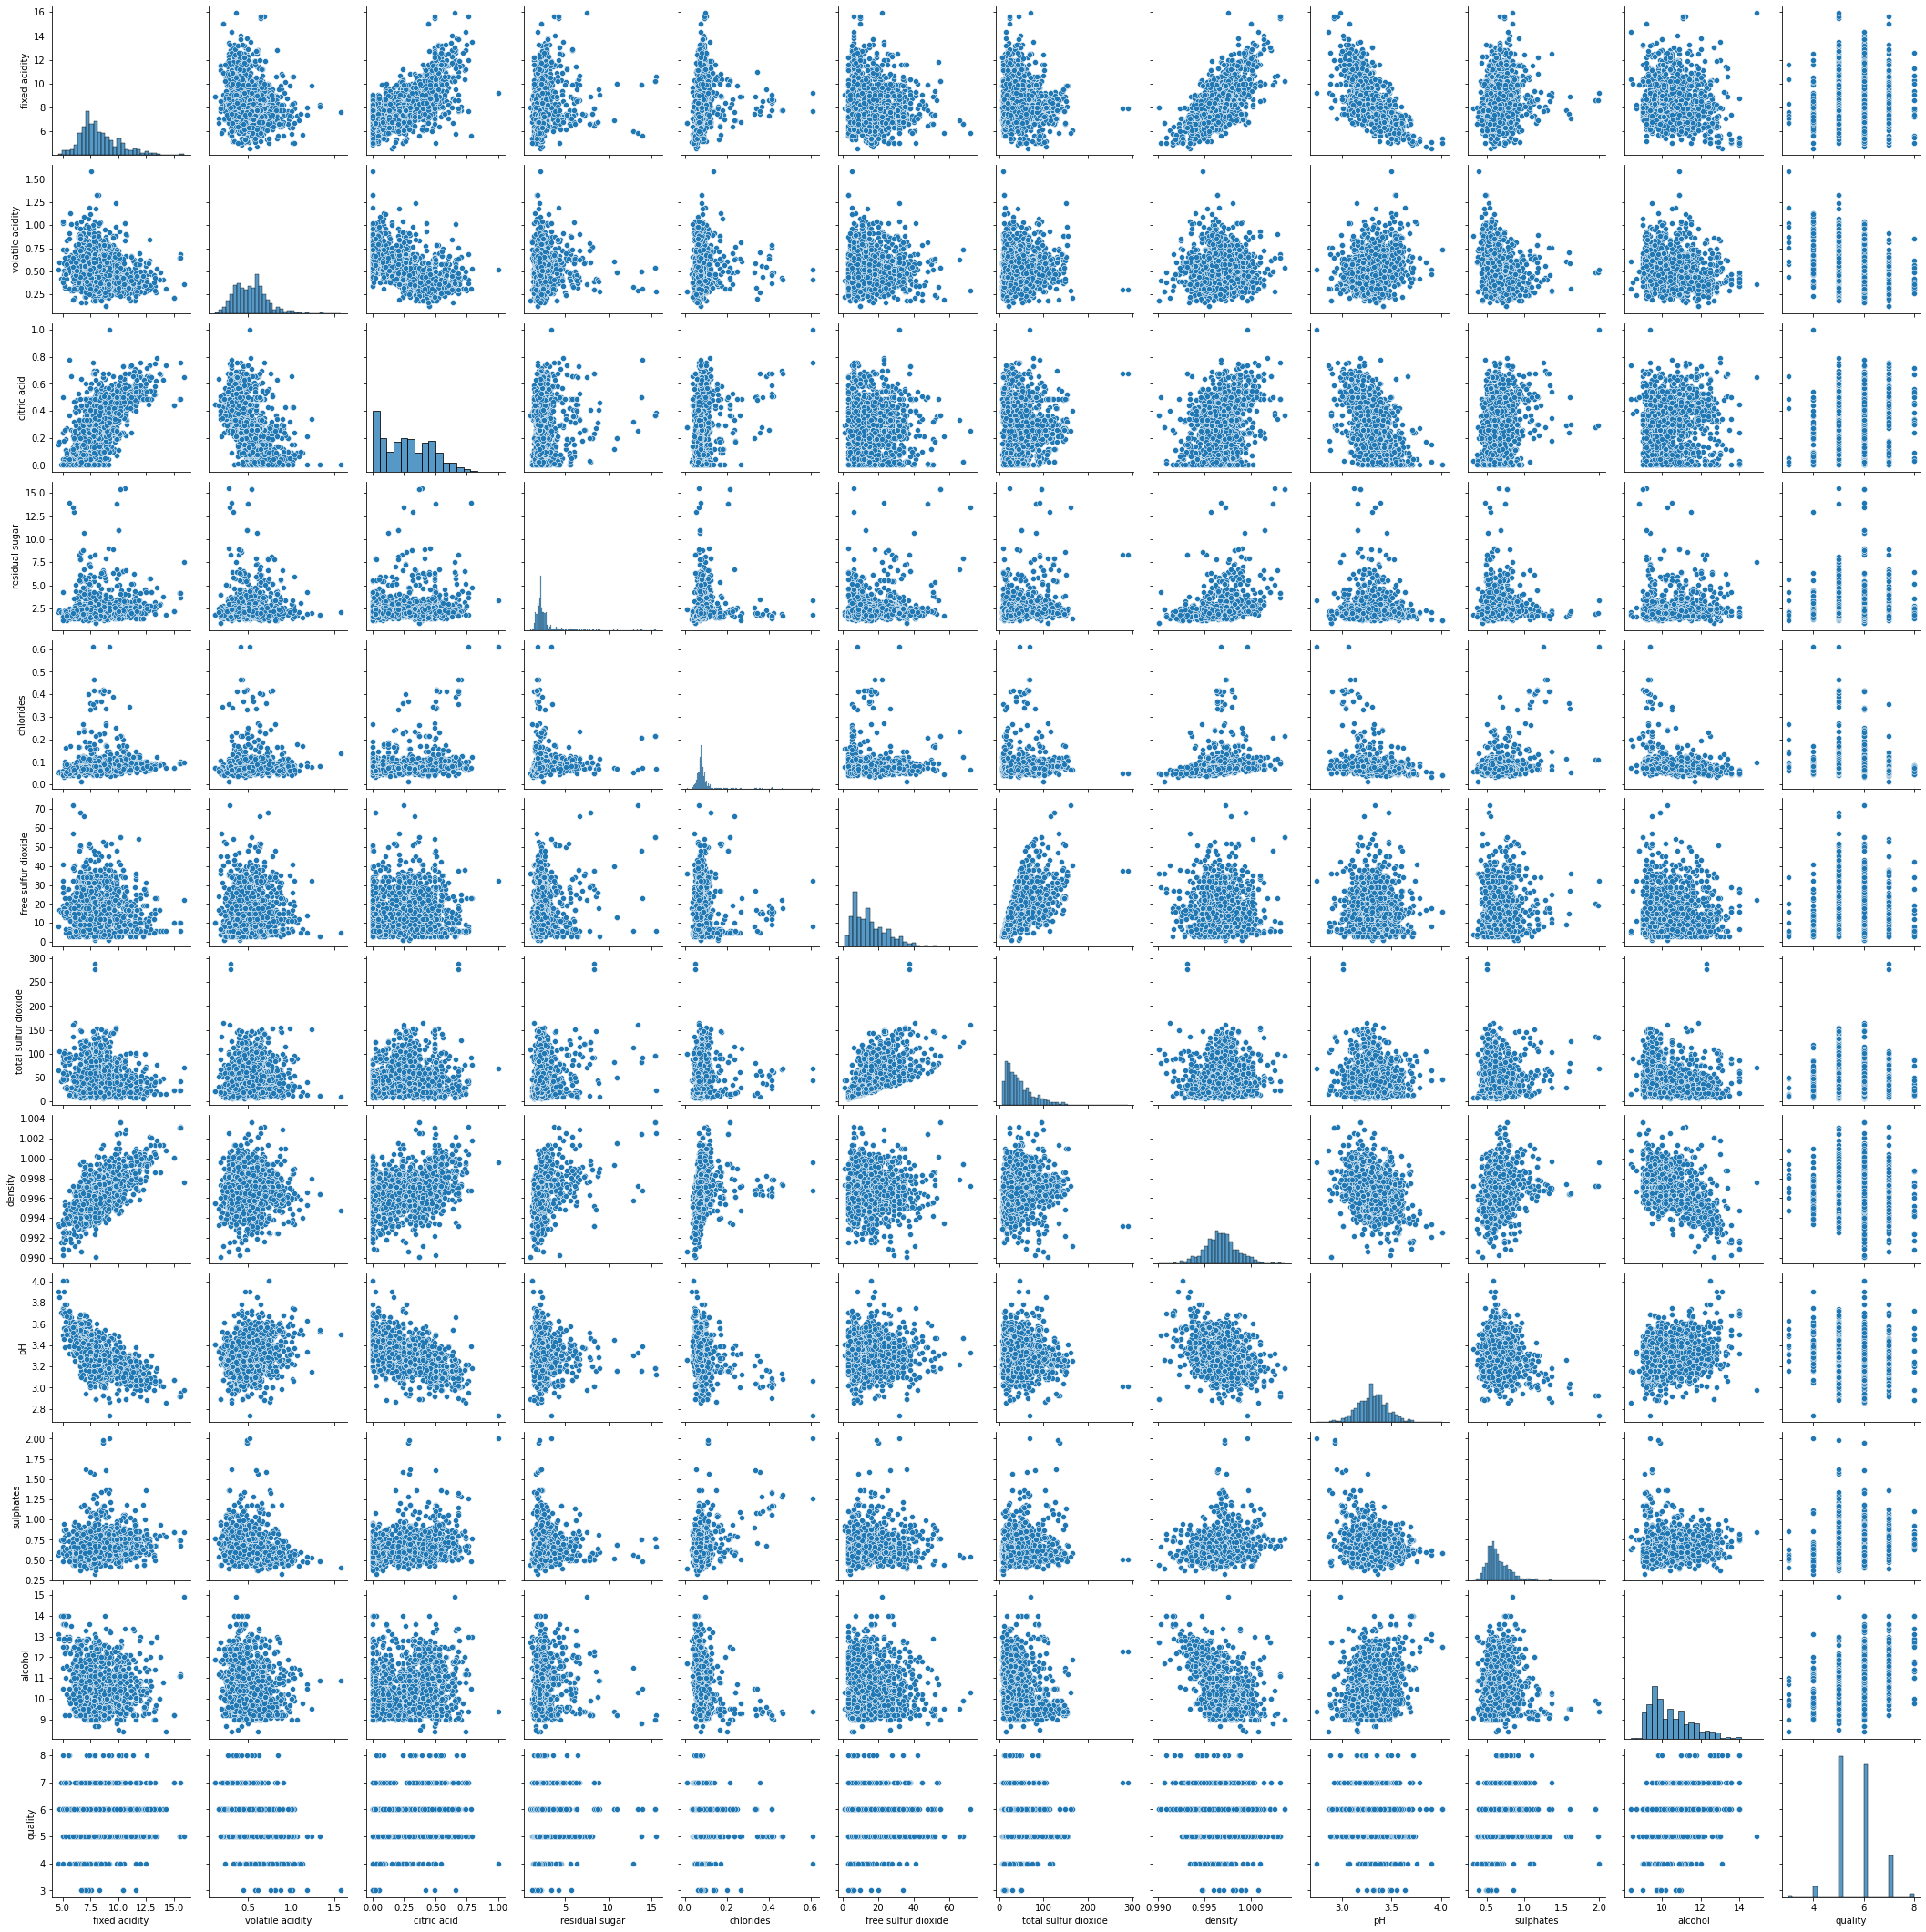

In [7]:
#Visualización grafica de los datos dispersion par, por variables
sns.pairplot(df_wineNoNorm)

In [8]:
#Se presenta la matriz de coorelación entre las variables
matrizCorNoNorm = df_wineNoNorm.corr()
matrizCorNoNorm

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256031,0.671796,0.114749,0.093726,-0.153814,-0.113144,0.668095,-0.683083,0.183002,-0.061786,0.123932
volatile acidity,-0.256031,1.000000,-0.552067,0.002057,0.061252,-0.010441,0.076326,0.021929,0.235338,-0.261085,-0.201941,-0.390200
citric acid,0.671796,-0.552067,1.000000,0.143516,0.203985,-0.061067,0.035719,0.365210,-0.542407,0.312872,0.109529,0.225931
residual sugar,0.114749,0.002057,0.143516,1.000000,0.055620,0.187042,0.203057,0.355303,-0.085691,0.005522,0.042018,0.013651
chlorides,0.093726,0.061252,0.203985,0.055620,1.000000,0.005567,0.047388,0.200626,-0.265016,0.371265,-0.221130,-0.128884
free sulfur dioxide,-0.153814,-0.010441,-0.061067,0.187042,0.005567,1.000000,0.667691,-0.021939,0.070363,0.051655,-0.069447,-0.050707
total sulfur dioxide,-0.113144,0.076326,0.035719,0.203057,0.047388,0.667691,1.000000,0.071252,-0.066450,0.042954,-0.205595,-0.185026
density,0.668095,0.021929,0.365210,0.355303,0.200626,-0.021939,0.071252,1.000000,-0.341685,0.148511,-0.496187,-0.174888
pH,-0.683083,0.235338,-0.542407,-0.085691,-0.265016,0.070363,-0.066450,-0.341685,1.000000,-0.196664,0.205540,-0.057908
sulphates,0.183002,-0.261085,0.312872,0.005522,0.371265,0.051655,0.042954,0.148511,-0.196664,1.000000,0.093587,0.251422


##**VERIFICACION DE LOS COEFICIENTES DE LR POR SKLEARN**

In [9]:
#Se crea una función para normalizarlos datos

def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)

df_wineNorm = round(mean_norm(df_wineNoNorm),2)

In [10]:
#Se divide los datos en las caracteristicas (features),  y el objetivo (target)
X = df_wineNorm.iloc[:,:-1]
y = df_wineNorm.iloc[:,-1]

In [11]:
#Se divide en conjutos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2)

In [38]:
#Creamos la regresion y la ponemos a prueba
reg = LinearRegression()
reg.fit(X_train, y_train)
reg_pred = reg.predict(X_test)
print('COEFICIENTE:', reg.coef_,'\n')
print('ERROR CUADRATICO MEDIO: {:}\n'.format(mean_squared_error(y_test, reg_pred)))
print('COEFICIENTE DE DETERMINACION: {:}'.format(r2_score(y_test, reg_pred)))

COEFICIENTE: [ 0.04645331 -0.27121216 -0.08135928  0.03211486 -0.10830106  0.07685726
 -0.1552309  -0.04848848 -0.10339346  0.20626428  0.33849796] 

ERROR CUADRATICO MEDIO: 0.7977380393819555

COEFICIENTE DE DETERMINACION: 0.3101466191069051


# SGD

In [13]:
#Intento
#temporal = regDG.coef_
#costo = list()
#for i in range(0,1000):
  #error = X*regDG.coef_-y
  #print(error.shape)
  #for j in range(11):
    #x_i = X.iloc[:,j]
    #termino = error * x_i
    #print((regDG.coef_[j] - ((0.01/1598)*termino.sum())))
    #temporal[j] = regDG.coef_[j] - ((0.01/1598)*termino.sum())
  #theta=temporal 
  #costo.append(cost(X,y,theta))


In [14]:
#Creamos la regresion que usa el metodo del descenso del gradiente y la ponemos a prueba
from sklearn.linear_model import SGDRegressor

regDG = SGDRegressor(alpha=0.01,max_iter=1000)
regDG.fit(X_train, y_train)
regDG_pred = regDG.predict(X_test)
print('Coeficiente: ',regDG.coef_)

Coeficiente:  [ 0.06166077 -0.25227903 -0.07807974  0.03129503 -0.0928245   0.06902366
 -0.15980602 -0.07164478 -0.07908833  0.21185481  0.3102048 ]


In [33]:
import numpy as np
#CALCULANDO LA FUNCION DE COSTO FORMA 1
X = X
y = y
get_theta = lambda theta: np.array([[0,0,0,0,0,0,0,0,0,0, theta]])

thetas = list(map(get_theta, regDG.coef_))

#X = np.hstack([np.ones([3,1 ]), X])
print(X.shape)
def cost(X, y, theta):
    
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

print(thetas[1].T.shape)
for i in range(len(thetas)):
    f_cost= cost(X, y, thetas[i])


print(f_cost[0])

(1598, 11)
(11, 1)
0.360130786087


In [15]:
#FUNCION DE COSTO FORMA 2

def cost(X, y, theta):
    inner = np.power(((X @ theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))
    
cost(X,y,regDG.coef_)

#FUNCION DE COSTO MANUAL C++
l = [0.506189, 0.499735, 0.493522, 0.48754, 0.481781, 0.476235, 0.470895, 0.465751, 0.460797, 0.456024, 0.451427, 0.446997, 0.442729, 0.438617, 0.434653, 0.430834, 0.427152, 0.423603, 0.420182, 0.416884, 0.413704, 0.410638, 0.407681, 0.404829, 0.402079, 0.399426, 0.396868, 0.394399, 0.392018, .38972,  0.387503, 0.385364, 0.383299, 0.381307, 0.379383, 0.377527, 0.375735, 0.374005, 0.372335, 0.370722, 0.369165, 0.367661, 0.366208, 0.364806, 0.363451, 0.362142, 0.360878,   0.359656, 0.358476, 0.357336, 0.356234, 0.355169, 0.354139, 0.353144, 0.352183, 0.351253, 0.350354, 0.349485, 0.348645, 0.347832, 0.347047, 0.346287, 0.345551, .34484, 0.344152, 0.343487, 0.342843, 0.34222, .341617,  0.341033, 0.340468, 0.339921, 0.339392, 0.338879, 0.338383, 0.337902, 0.337437, 0.336986, 0.336549, 0.336127, 0.335717, 0.33532, 0.334935, 0.334562, 0.334201, 0.33385, 0.333511, 0.333182, 0.332862, 0.332553, 0.332253, 0.331961, 0.331679, 0.331405, 0.331139, 0.330881,0.33063,0.330387,0.330151,0.329922,0.3297,0.329484,0.329274,0.32907,0.328872,0.32868,0.328493,0.328311,0.328135,0.327963,0.327796,0.327634,0.327476,0.327323,0.327173,0.327028,0.326887,0.326749,0.326615,0.326485,0.326358,0.326234,0.326114,0.325997,0.325883,0.325771,0.325663,0.325557,0.325454,0.325354,0.325256,0.32516,0.325067,0.324976,0.324887,0.3248,0.32471,0.324633,0.324553,0.324474,0.324397,0.324322,0.324249,0.324177,0.324107,0.324039,0.323972,0.323906,0.323842,0.323779,0.323718,0.323658,0.323599,0.323542,0.323486,0.323431,0.323377,0.323324,0.323272,0.323221,0.323172,0.323123,0.323075,0.323028,0.322982,0.322937,0.322893,0.32285,0.322807,0.322766,0.322725,0.322684,0.322645,0.322606,0.322568,0.322531,0.322494,0.322458,0.322422,0.322387,0.322353,0.322319,0.322286,0.322253,0.322221,0.32219,0.322159,0.322128,0.322098,0.322068,0.322039,0.32201,0.321982,0.321954,0.321927,0.3219,0.32187,0.321847,0.321821,0.321796,0.321771,0.321746,0.321721,0.321697,0.321674,0.32165,0.321627,0.321604,0.321582,0.32156,0.321538,0.321516,0.321495,0.321474,0.321453,0.321433,0.321412,0.321392,0.321372,0.321353,0.321334,0.321315,0.321296,0.321277,0.321259,0.321241,0.321223,0.321205,0.321187,0.32117,0.321153,0.321136,0.321119,0.321103,0.321086,0.32107,0.321054,0.321038,0.321023,0.321007,0.320992,0.320977,0.320962,0.320947,0.320932,0.320917,0.320903,0.320889,0.320875,0.320861,0.320847,0.320833,0.32082,0.320806,0.320793,0.32078,0.320767,0.320754,0.320741,0.320728,0.320716,0.320703,0.320691,0.320679,0.320667,0.320655,0.320643,0.320631,0.320619,0.320608,0.320596,0.320585,0.320574,0.320563,0.320552,0.320541,0.32053,0.320519,0.320509,0.320498,0.320488,0.320477,0.320467,0.320457,0.320447,0.320437,0.320427,0.320417,0.320407,0.320397,0.320388,0.320378,0.320369,0.32036,0.32035,0.320341,0.320332,0.320323,0.320314,0.320305,0.320296,0.320287,0.320279,0.32027,0.320262,0.320253,0.320245,0.320236,0.320228,0.32022,0.320212,0.320203,0.320195,0.320188,0.32018,0.320172,0.320164,0.320156,0.320149,0.320141,0.320133,0.320126,0.320119,0.320111,0.320104,0.320097,0.320089,0.320082,0.320075,0.320068,0.320061,0.320054,0.320047,0.32004,0.320034,0.320027,0.32002,0.320014,0.320007,0.32,0.319649,0.319645,0.319641,0.319637,0.319633,0.319629,0.319625,0.319621,0.319617,0.319614,0.31961,0.319606,0.319602,0.319598,0.319302,0.3193,0.31929,0.319297,0.319295,0.319293,0.319291,0.319289,0.319287,0.319285,0.319284,0.319282,0.31928,0.319278,0.319276,0.319275,0.319273,0.319271,0.319269,0.319268,0.319266,0.319264,0.319262,0.319087,0.319086,0.319085,0.319084,0.319084,0.319083,0.319082,0.319081,0.319081,0.31908,0.319079,0.319078,0.319077,0.319077,0.319076,0.319075,0.319075,0.319074,0.319073,0.319072,0.319072,0.319071,0.31907,0.319069,0.319069,0.319068,0.319067,0.319067,0.319066,0.319065,0.319064,0.319064,0.319009,0.319009,0.319008,0.319008,0.319008,0.319007,0.319007,0.319006,0.319006,0.319005,0.319005,0.319004,0.319004,0.319004,0.319003,0.319003,0.319002,0.319002,0.319001,0.319001,0.319001,0.319,0.319,0.318999,0.318999,0.318999,0.318998,0.318998,0.318997,0.318997,0.318996,0.318996,0.318996,0.318995,0.318995,0.318994,0.318994,0.318994,0.318993,0.318993,0.318992,0.318952,0.318952,0.318952,0.318951,]

##**GRADICA DE LA FUNCION DE COSTO**

In [27]:
import plotly.express as px
x_graf = [i for i in range(len(l))]
px.line(y=l,x=x_graf,title='GRAFICA FUNCION DE COSTO')